## INTRODUCTION

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://esq-law.com/wp-content/uploads/2019/03/netflix.jpg")

### What is Netflix?


Netflix is a subscription-based streaming service that allows members to watch TV shows and movies without commercials on an internet-connected device and can download TV shows and movies to iOS, Android, or Windows 10 device and watch without an internet connection.

## 1. DATA WRANGLING

This is the process of gathering, cleaning, and transforming raw data to enrich it into a desired format for better analysis and exploration

### 1.1 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
import matplotlib.patches as mpatches
plt.style.use('fivethirtyeight')  
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


### 1.2 Loading the dataset

In [3]:
netflix = pd.read_csv("netflix_titles.csv")

In [4]:
# Printing the first 5 values
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### 1.3 Data Cleaning

In [5]:
# Checking the shape of the dataset
netflix.shape

(7787, 12)

In [6]:
#Checking for NULL values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
#Checking for duplicate values
netflix.duplicated().sum()

0

In [8]:
# Dropping the 'cast' columns 
netflix.drop(["show_id", "description", "release_year"], axis=1, inplace=True)

In [9]:
# Replacing NULL values for director to No Data
netflix["director"].replace(np.nan,"NoData", inplace=True)

In [10]:
# Dropping missing rows in "date_added" and "rating"
netflix.dropna(inplace=True)

In [11]:
netflix.shape

(6643, 9)

In [12]:
# Checking the datatype of the columns
netflix.dtypes

type          object
title         object
director      object
cast          object
country       object
date_added    object
rating        object
duration      object
listed_in     object
dtype: object

In [13]:
# Changing the dtype for date_added
netflix["date_added"] = pd.to_datetime(netflix["date_added"])

# Creating new columns for month, year and day
netflix["month_added"]=netflix["date_added"].dt.strftime("%b")
netflix["year_added"] = netflix["date_added"].dt.year
netflix["day_added"] = netflix["date_added"].dt.day_name()

In [14]:
#Dropping "date_added" column as it is no longer needed
netflix.drop(["date_added"], axis=1, inplace=True)

In [15]:
# Re-ordering the columns for simplicity

netflix = netflix [["type", "title", "country", "rating", "duration", "listed_in", "day_added", "month_added", "year_added", "cast", "director"]]

In [16]:
#Creating a dictionary to map the ratings values to age category for further analysis  

age_ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Mature',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Mature',
    'TV-Y': 'Younger Kids',
    'NR': 'Mature',
    'PG-13': 'Teens',
    'TV-G': 'Younger Kids',
    'PG': 'Older Kids',
    'G': 'Younger Kids',
    'UR': 'Mature',
    'NC-17': 'Mature'
}

#Creating new column
netflix["ratings_by_age"]= netflix ["rating"].replace(age_ratings)

## 2. ANALYSIS

### 2.1. What Content types are available in Netflix?

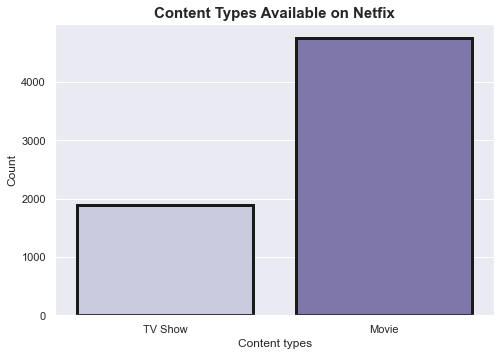

In [17]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(7,5)})

#Creating plot
ax = sns.countplot(x="type", data=netflix, palette="Purples", edgecolor="k", linewidth=3)

#Setting title and customizing labels
ax.set_title("Content Types Available on Netfix", fontsize=15, fontweight="bold")

ax.set_xlabel("Content types", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

#Showing plot
plt.show()


Insight :

This shows that there are at least 2000 TV Shows and over 5000 Movies present on Netflix. Therefore nearly two-thirds of the content on Netflix are movies while the remaining one-third is for TV Shows

### 2.2. What countries have the highest number of content?

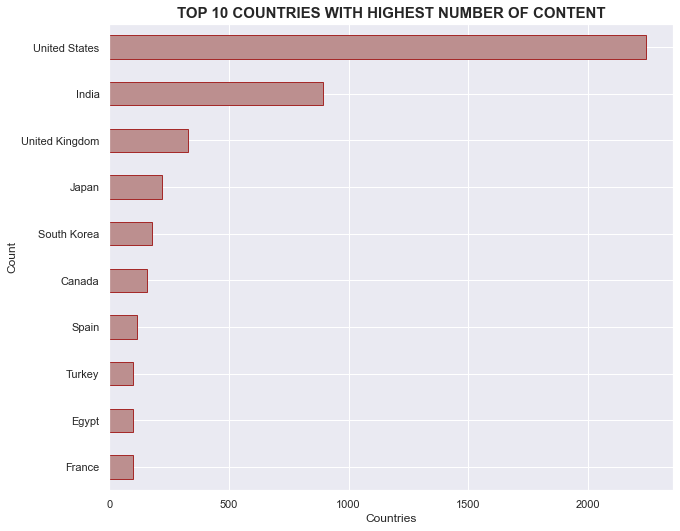

In [18]:
#Creating subset for countries
countries = pd.crosstab(netflix["country"], ["type"]).nlargest(10, "type")

#Setting theme and size
sns.set(rc={'figure.figsize':(9,8)})

#Creating plot
ax = countries.sort_values("type", ascending=True).plot(kind="barh", color='rosybrown', legend=False, edgecolor="brown", linewidth=1)

#Setting title and customizing labels
ax.set_title("TOP 10 COUNTRIES WITH HIGHEST NUMBER OF CONTENT", fontsize=15, fontweight="bold")

ax.set_xlabel("Countries", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

#Showing plot
plt.show()

Insight:

United States, India, United Kingdom, Japan and South Korea are the top leading countries in terms of number of content on Netflix. Although from the chart above, United States has more than half of the content on Netflix. 


### 2.3. What is the trend of contents added over the years?

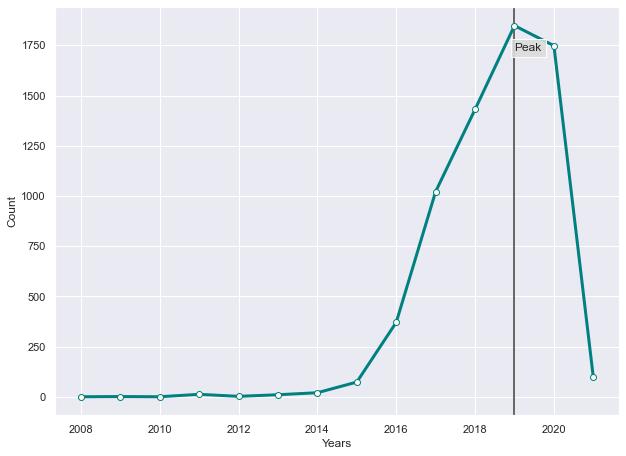

In [19]:
#Creating subset for yearly trend
year_trend = pd.crosstab(netflix["year_added"], ["type"], colnames=["year_added"]).sort_values("year_added", ascending=False)

#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,7)})

#Creating plot
ax = year_trend.plot(kind="line", linewidth=3, color="teal", marker="o",markerfacecolor="ivory", legend=False)

#Creating axhline
plt.axvline(x=2019, linewidth=2, zorder=1,color="dimgrey")
plt.annotate(text="Peak", xy=(2019, 1720), fontsize=12, xycoords="data", bbox=dict(facecolor="gainsboro",alpha=0.9))

# Setting labels
ax.set_xlabel("Years", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

#Showing plot
plt.show()

Insight:

From the chart, it can be observed that from 2008 to 2014, not much content were added on Netflix, but by 2015, Netflix began to add more contents. 2019 was the peak year with over 1800 movies on Netflix and also the point of descent as the number of movies begin to decline  

### 2.3.1. Over the years, what content type was added more: Movie or TV Show?

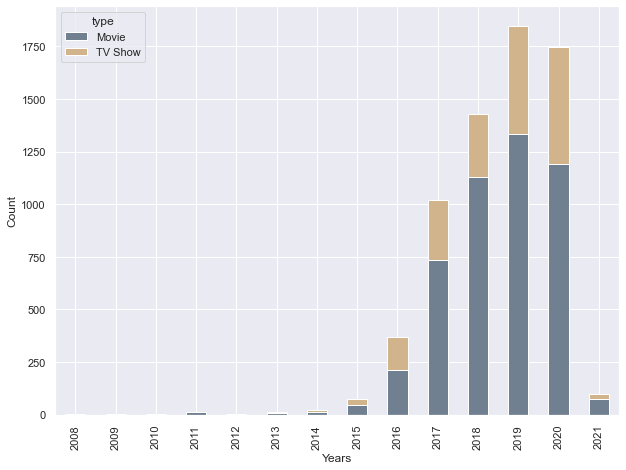

In [20]:
#Creating subset for year on year trend
year_trendbar = pd.crosstab (netflix ["year_added"], netflix["type"])

#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,7)})

#Creating plot
ax = year_trendbar.plot.bar(stacked=True, linewidth=1, color=["slategrey", "tan"])

# Setting labels
ax.set_xlabel("Years", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

#Showing plot
plt.show()


Insight:

It is so glaring that over the years more movie content has been added than tv show content. It could be said that the ratio of movies added to that of tv shows is almost 2:1.

### 2.4. What is the trend of contents added over the month?

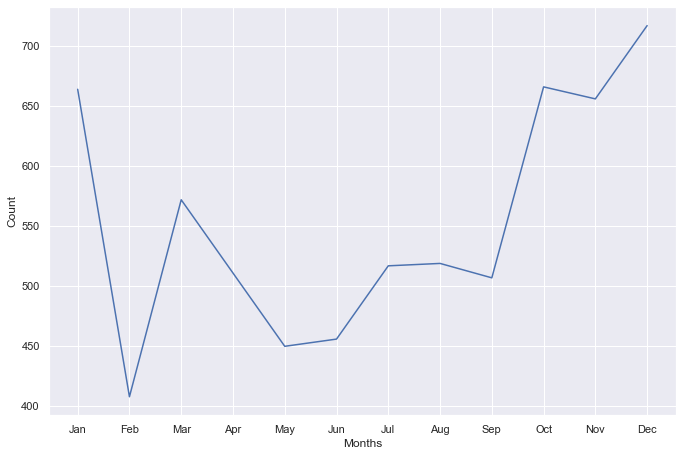

In [21]:
#Creating subset for monthly trends
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_trend = pd.crosstab(netflix["month_added"], ["type"]).reindex(month)

#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,7)})

#Creating plot
ax = sns.lineplot(x='month_added', y='type', data=month_trend, palette="blues", markers = "s")

# Setting labels
ax.set_xlabel("Months", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

#Showing plot
plt.show()

Insight:

As seen from the line chart above, majority of Netflix’s contents were uploaded from September to January as we approach the holidays, with most uploaded in December and January.

### 2.5. What is the trend of contents added during the week?

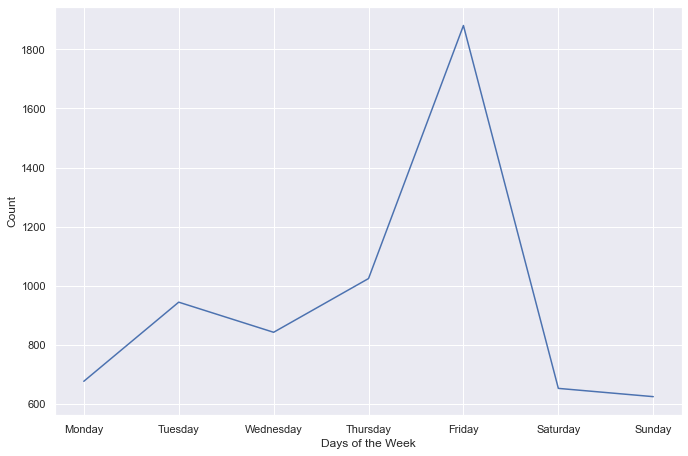

In [22]:
#Creating subset for weekly trends
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
week_trend = pd.crosstab(netflix["day_added"], ["type"]).reindex(days)

#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,7)})

#Creating plot
ax = sns.lineplot(x='day_added', y='type', data=week_trend, palette="blues", markers = "s")

# Setting labels
ax.set_xlabel("Days of the Week", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

#Showing plot
plt.show()



Insight: 

It can be seen that more contents are uploaded on Friday than any other day of the week.


### 2.6. What are the top genres in Netflix?

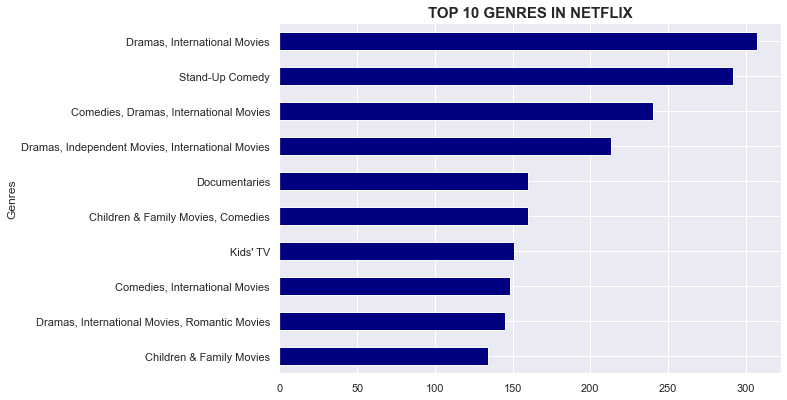

In [23]:
#Creating subset for genres
genres = netflix["listed_in"].value_counts().nlargest(10)

#Setting theme and size
sns.set(rc={'figure.figsize':(8,6)})

#Creating plot
ax = genres.sort_values().plot(kind="barh", color='navy', legend=False, edgecolor="ghostwhite", linewidth=1)

#Setting title and customizing labels
ax.set_title("TOP 10 GENRES IN NETFLIX", fontsize=15, fontweight="bold")

ax.set_ylabel("Genres", fontsize=12)

#Showing plot
plt.show()

### 2.6.1. What are the top movie genres and tvshow genres?

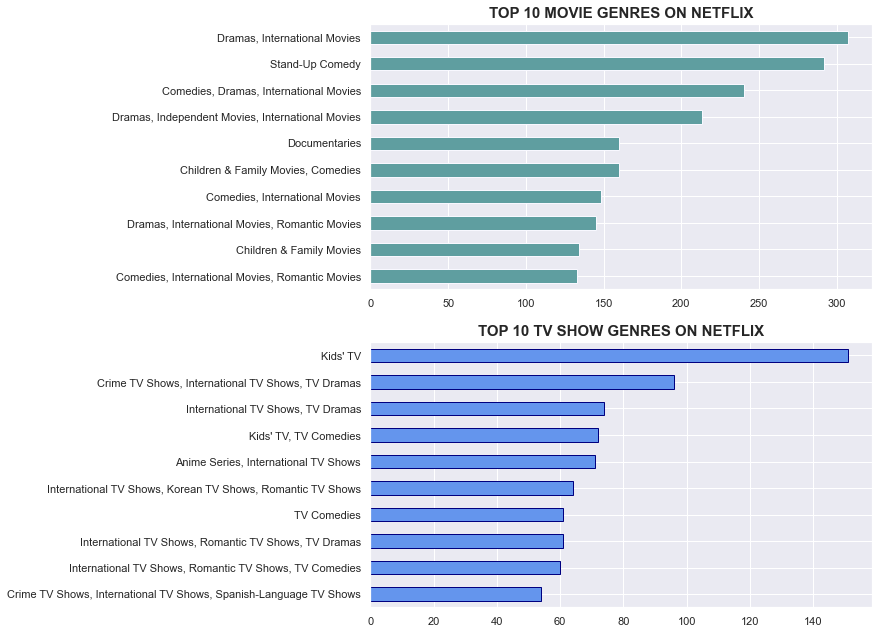

In [24]:
#Creating a subset of the dataframe for movie and tvshow
tvshow = netflix[netflix["type"]=="TV Show"]
movie =  netflix[netflix["type"]=="Movie"]  

#Creating subsets for genres of movie and tvshow
genres_movie = movie["listed_in"].value_counts().nlargest(10)
genres_tvshow = tvshow["listed_in"].value_counts().nlargest(10)

#Setting theme and size
fig = plt.figure(figsize=(8, 10))
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[10, 10], width_ratios=[10])

#Creating plot
ax1 = plt.subplot(gs[0])
ax1 = genres_movie.sort_values().plot(kind="barh", color='cadetblue', legend=False, edgecolor="ghostwhite", linewidth=1)

ax2 = plt.subplot(gs[1])
ax2 = genres_tvshow.sort_values().plot(kind="barh", color='cornflowerblue', legend=False, edgecolor="navy", linewidth=1)

#Setting title and customizing labels
ax1.set_title("TOP 10 MOVIE GENRES ON NETFLIX", fontsize=15, fontweight="bold")
ax2.set_title("TOP 10 TV SHOW GENRES ON NETFLIX", fontsize=15, fontweight="bold")

#Showing plot
plt.show()


Insight:

It can be seen that the most uploaded movie genre is Drama,International Movies while the most uploaded tvshow genre is Kids' TV


### 2.7. What is the duration of contents on Netflix?

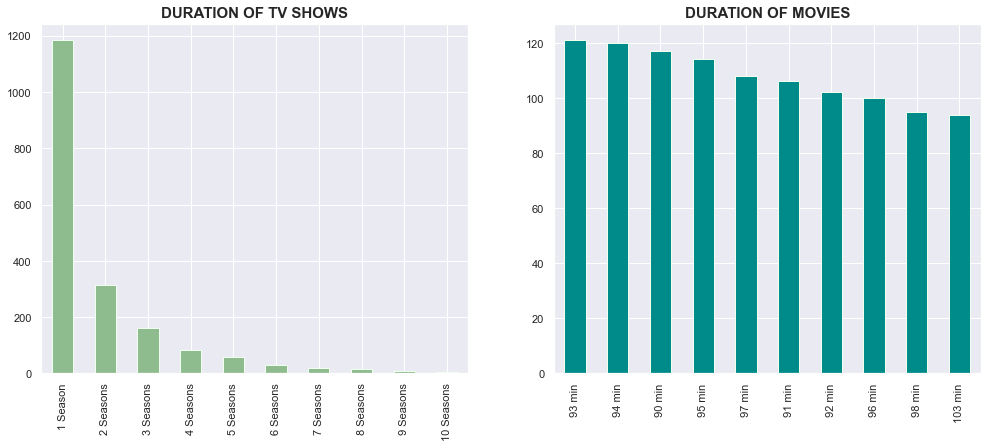

In [25]:
#Creating subset for duration of movie and tvshow
duration_tvshow = tvshow["duration"].value_counts().nlargest(10)
duration_movie = movie["duration"].value_counts().nlargest(10)

#Setting theme and size
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[10], width_ratios=[10, 10])

#Creating plot
ax1 = plt.subplot(gs[0])
ax1 = duration_tvshow.plot(kind="bar", color='darkseagreen', legend=False, edgecolor="honeydew", linewidth=1)

ax2 = plt.subplot(gs[1])
ax2 = duration_movie.plot(kind="bar", color='darkcyan', legend=False, edgecolor="honeydew", linewidth=1)

#Setting title and customizing labels
ax1.set_title("DURATION OF TV SHOWS", fontsize=15, fontweight="bold")
ax2.set_title("DURATION OF MOVIES", fontsize=15, fontweight="bold")

#Showing plot
plt.show()


Insight:

It can be observed that the duration of most seasons on netflix is Season 1 while the duration of most movies is between 90 mins to 98 mins

### 2.8. What is the rating with the most uploads on Netflix?

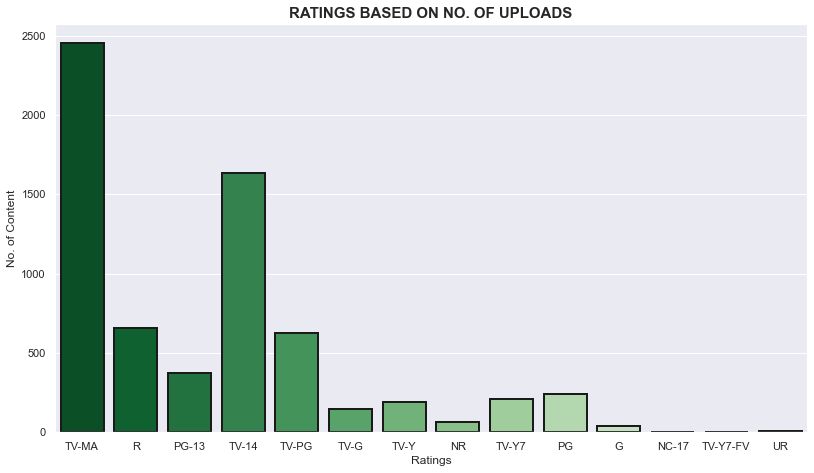

In [32]:

#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,7)})

#Creating plot
ax = sns.countplot(x="rating", data=netflix, palette="Greens_r", edgecolor="k", linewidth=2)

#Setting title and customizing labels
ax.set_title("RATINGS BASED ON NO. OF UPLOADS", fontsize=15, fontweight="bold")

ax.set_xlabel("Ratings", fontsize=12)
ax.set_ylabel("No. of Content", fontsize=12)

#Showing plot
plt.show()

Insight:

TV-MA and TV-14 ratings have the highest content on Netflix while NC-17, TV-Y7-FV and UR ratings have the least content on Netflix

### 2.8.1. What is the rating category with the most uploads based on content types?

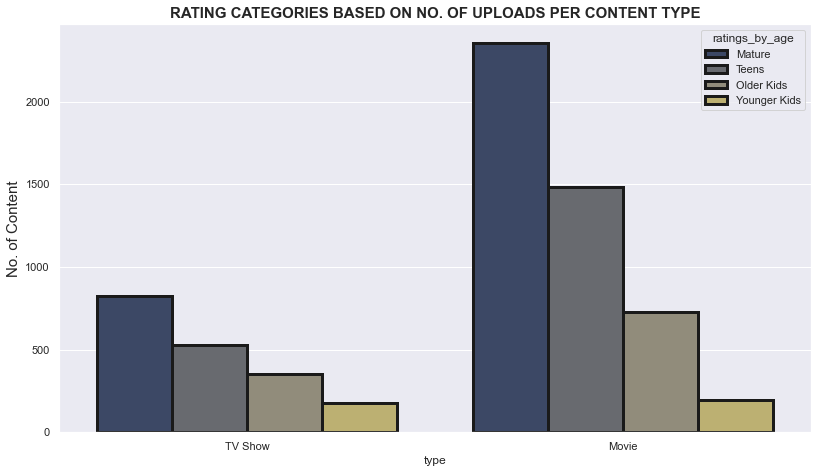

In [34]:

#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,7)})

#Creating plot
ax = sns.countplot(x="type", data=netflix,hue="ratings_by_age", palette="cividis", edgecolor="k", linewidth=3)

#Setting title and customizing labels
ax.set_title("RATING CATEGORIES BASED ON NO. OF UPLOADS PER CONTENT TYPE", fontsize=15, fontweight="bold")

ax.set_ylabel("No. of Content", fontsize=15)

#Showing plot
plt.show()

Insight

It is observed that for both Movie and TV Show types, Movies for Matured age is most uploaded and the least uploaded is movies for younger kids.

### 2.8.2. What is the distribution of the ratings in the rating category?

In [35]:
# Creating dataframe for distribution
case_dist = netflix[["ratings_by_age", "rating"]]

#Distribution for Mature
dist_mature = case_dist[case_dist['ratings_by_age'] == 'Mature']
dist_mature = dist_mature["rating"].value_counts()

#Distribution for Teens
dist_teens = case_dist[case_dist['ratings_by_age'] == 'Teens']
dist_teens = dist_teens["rating"].value_counts()

#Distribution for Older Kids
dist_olderkids = case_dist[case_dist['ratings_by_age'] == 'Older Kids']
dist_olderkids = dist_olderkids["rating"].value_counts()

#Distribution for Younger Kids
dist_youngerkids = case_dist[case_dist['ratings_by_age'] == 'Younger Kids']
dist_youngerkids = dist_youngerkids["rating"].value_counts()

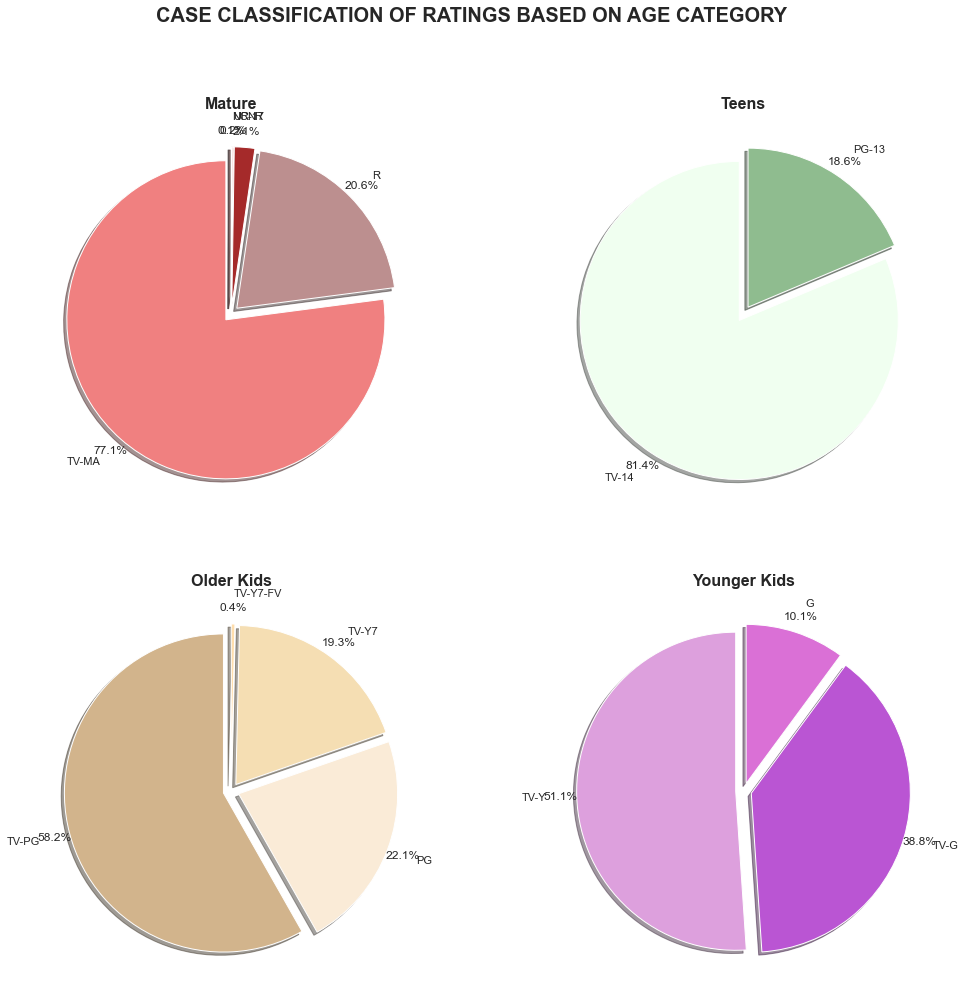

In [36]:
# Setting plot area, color and labels
fig = plt.figure(figsize = (15,15))
colors_series = ['cornflowerblue','orangered','gold', 'green', 'yellow', 'blue']


#Pie chart for Mature
plt.subplot(221)
plt.pie(dist_mature.values.flatten(), labels = dist_mature.index, colors = ["lightcoral", "rosybrown", "brown"], explode = (0.05,0.05,0.05,0.05,0.05),startangle = 90, autopct = '%1.1f%%', pctdistance=1.1, labeldistance=1.19, shadow = True)
plt.title('Mature', fontsize = 16, fontweight="bold")

#Pie chart for Teens
plt.subplot(222)
plt.pie(dist_teens.values.flatten(), labels = dist_teens.index, colors = ["honeydew", "darkseagreen"], explode = (0.05,0.05),startangle = 90, autopct = '%1.1f%%', pctdistance=1.1, labeldistance=1.19, shadow = True)
plt.title('Teens', fontsize = 16, fontweight="bold")

#Pie chart for Older Kids
plt.subplot(223)
plt.pie(dist_olderkids.values.flatten(), labels = dist_olderkids.index, colors = ["tan", "antiquewhite", "wheat", "navajowhite"], explode = (0.05,0.05,0.05,0.05),startangle = 90, autopct = '%1.1f%%', pctdistance=1.1, labeldistance=1.19, shadow = True)
plt.title('Older Kids', fontsize = 16, fontweight="bold")

#Pie chart for Younger Kids
plt.subplot(224)
plt.pie(dist_youngerkids.values.flatten(), labels = dist_youngerkids.index, colors = ["plum", "mediumorchid", "orchid"], explode = (0.05,0.05,0.05),startangle = 90, autopct = '%1.1f%%', pctdistance=1.1, labeldistance=1.19, shadow = True)
plt.title('Younger Kids', fontsize = 16, fontweight="bold")

#Title of plot
plt.suptitle('CASE CLASSIFICATION OF RATINGS BASED ON AGE CATEGORY', fontsize = 20, fontweight="bold")

#Showing the plot
plt.show()


Insights:

From the Mature category, TV-MA and R have more content in this category.

From Teens category, TV-14 has more content in this category.

From Older Kids category, TV-PG has more content in this category.

From Younger Kids, TV-Y and TV-G has more content in this category

### 2.9. What are the top genres available on netflix?

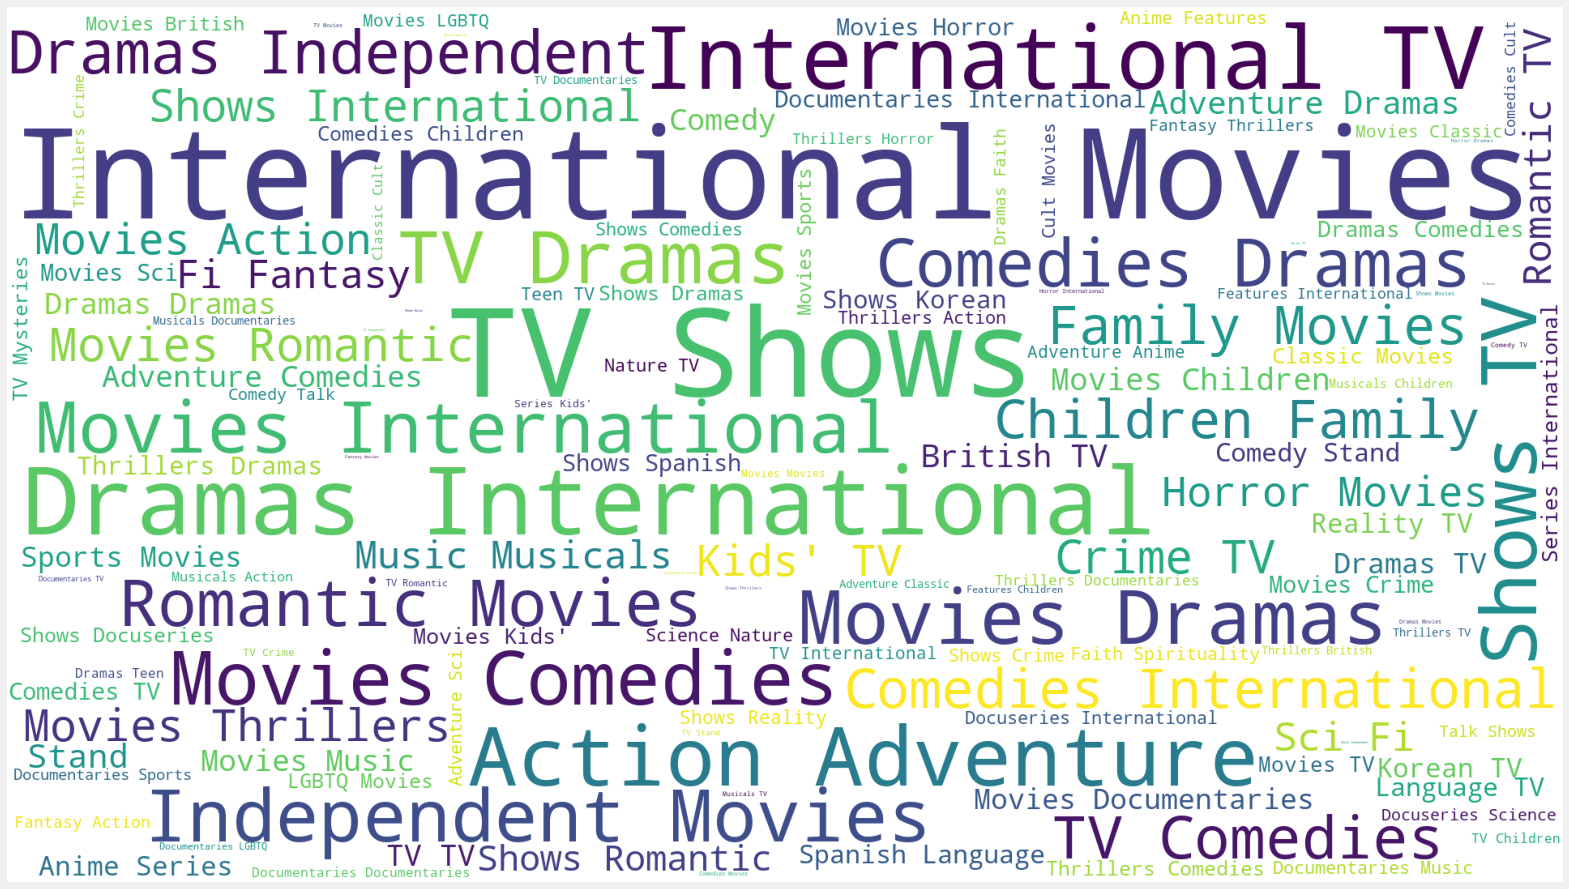

In [32]:
#Setting fig size
plt.subplots(figsize=(25,15))

#Using wordcloud function
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix.listed_in))

#Creating worldcloud                         
plt.imshow(wordcloud)
plt.axis('off')

#Saving image
plt.savefig('category.png')

#Showing plot
plt.show()

Insights:

The word-cloud above gives a brief over view of the top categories. The bigger the word the higher the number of contents.

It can be seen that the top categories include international movies, TV-shows, Independent movies, Action, Adventure, Romantics movies, Comedies, Dramas, etc. While categories with low contents as shown by the size of their text include Anime series, Documentaries Science, Faith Spirituality, Adventure Anime, etc.
